In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data = pd.read_csv("/content/ARIMA.csv")

In [ ]:
data.head(10)

,TIME,INFLATION
0,Jan-01,-0.2
1,Feb-01,-0.4
2,Mar-01,0.5
3,Apr-01,0.7
4,May-01,0.7
5,Jun-01,1.3
6,Jul-01,1.3
7,Aug-01,0.6
8,Sep-01,-0.2
9,Oct-01,0.6


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

import pandas as pd

# Assuming your data is in a pandas dataframe called 'data'
data['TIME'] = pd.to_datetime(data['TIME'], format='%b-%d')


# Set the 'TIME' column as the index
data.set_index('TIME', inplace=True)





In [ ]:
data.head()

,INFLATION
TIME,
1900-01-01,-0.2
1900-02-01,-0.4
1900-03-01,0.5
1900-04-01,0.7
1900-05-01,0.7


In [ ]:
# Check for stationarity
# Perform the Dickey-Fuller test to see if the time series is stationary
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test
result = adfuller(data['INFLATION'])
print(f' Dickey-Fuller Test Statistic: {result[0]}')
print(f' p-value: {result[1]}')



 Dickey-Fuller Test Statistic: -1.8516420089744912
 p-value: 0.3551406924761441


this p vaule gives us the evidence to accept null hypothesis,which concludes the presence of unit roots (which is stationary data)

In [ ]:
# Perform the Dickey-Fuller test
result = adfuller(data['INFLATION'])
print(f'Dickey-Fuller Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

Dickey-Fuller Test Statistic: -1.8516420089744912
p-value: 0.3551406924761441
Critical Value (1%): -3.458128284586202
Critical Value (5%): -2.873761835239286
Critical Value (10%): -2.5732834559706235


non stationary to stationary data conversion

In [ ]:
# Since the series is not stationary, we difference the data
data['INFLATION_diff'] = data['INFLATION'].diff().dropna()

In [ ]:
# Re-perform the Dickey-Fuller test on the differenced data
result_diff = adfuller(data['INFLATION_diff'].dropna())
print(f'\nDickey-Fuller Test Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')
for key, value in result_diff[4].items():
    print(f'Critical Value ({key}): {value}')


Dickey-Fuller Test Statistic after differencing: -10.18205192917403
p-value after differencing: 6.655219526364423e-18
Critical Value (1%): -3.458128284586202
Critical Value (5%): -2.873761835239286
Critical Value (10%): -2.5732834559706235


In [ ]:
# Check if the p-value after differencing is less than the significance level (e.g., 0.05)
if result_diff[1] < 0.05:
    print("The differenced time series is stationary")
else:
    print("The differenced time series is still not stationary")

The differenced time series is stationary


Since 6.655219526364423e-18 is a very small number (close to zero) and is indeed much less than 0.05, the comparison value < threshold will return True.

In the context of the Dickey-Fuller test, a p-value of 6.655219526364423e-18 indicates that the null hypothesis (that the series is non-stationary) can be rejected with very high confidence, meaning that the series is stationary after differencing.



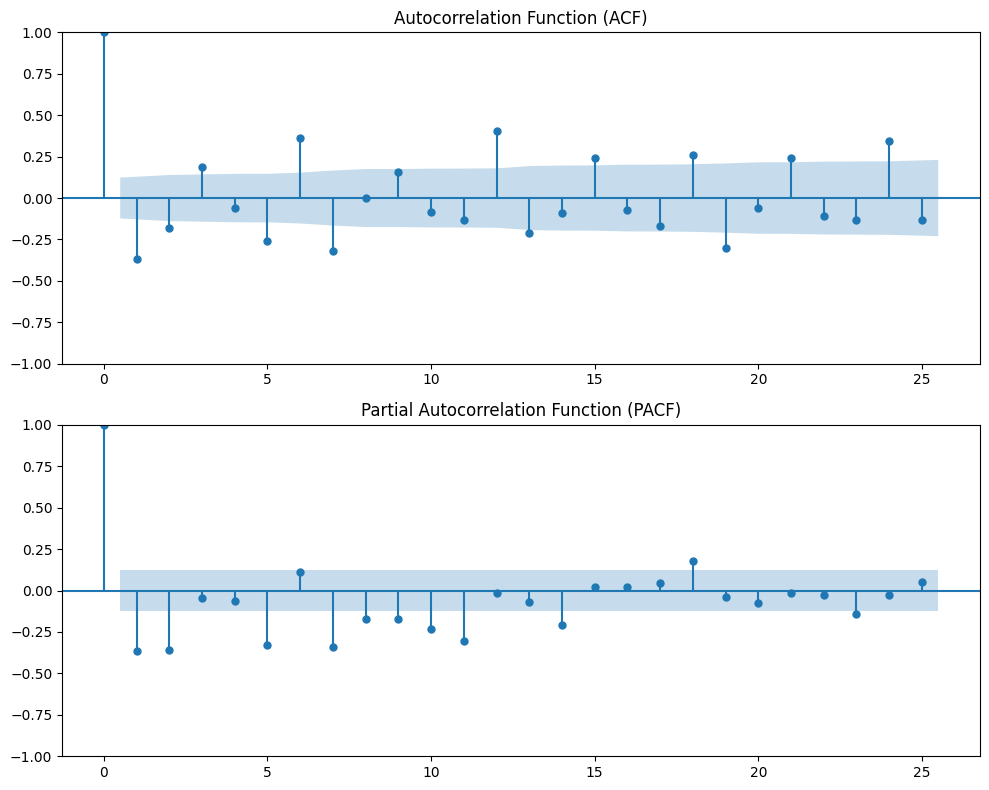

In [ ]:
# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(data['INFLATION_diff'].dropna(), ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(data['INFLATION_diff'].dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [ ]:
# Fit ARIMA models with different orders and select the best one based on AIC
orders = [(1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2), (3, 1, 3),(5,1,5),(6,1,6),(4,1,6)]
results = []
best_aic = float('inf')
best_order = None
best_model = None

for order in orders:
    try:
        model = ARIMA(data['INFLATION'], order=order)
        model_fit = model.fit()
        print(f'\nARIMA{order} AIC: {model_fit.aic}')
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
    except Exception as e:
        print(f'Error fitting ARIMA{order}: {e}')

print(f'\nBest ARIMA model: ARIMA{best_order} with AIC: {best_aic}')
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm


ARIMA(1, 1, 1) AIC: 565.2559035113894

ARIMA(1, 1, 2) AIC: 565.3622946022416


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm


ARIMA(2, 1, 1) AIC: 566.6746685561047


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm


ARIMA(2, 1, 2) AIC: 567.1507008413457


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm


ARIMA(3, 1, 3) AIC: 547.3930601534443


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels


ARIMA(5, 1, 5) AIC: 511.44004534300234


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels


ARIMA(6, 1, 6) AIC: 530.906315881593

ARIMA(4, 1, 6) AIC: 512.322348460236

Best ARIMA model: ARIMA(5, 1, 5) with AIC: 511.44004534300234
                               SARIMAX Results                                
Dep. Variable:              INFLATION   No. Observations:                  253
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -244.720
Date:                Thu, 04 Jul 2024   AIC                            511.440
Time:                        06:30:11   BIC                            550.264
Sample:                             0   HQIC                           527.062
                                - 253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7409      0.093     -7.996      0.000      -0.923     

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


So we got the arima(5,1,5) as the best arima of all as it have less AIC value compared to all models we have run.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro

In [ ]:
data = pd.read_csv("/content/GRANGER CAUSALITY TEST.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/GRANGER CAUSALITY TEST.csv'

In [ ]:
# Generate Sensex returns
data['Sensex_Return'] = data['Sensex'].pct_change()
data['Sensex_Return_t-1'] = data['Sensex_Return'].shift(1)
data = data.dropna()

KeyError: 'Sensex'

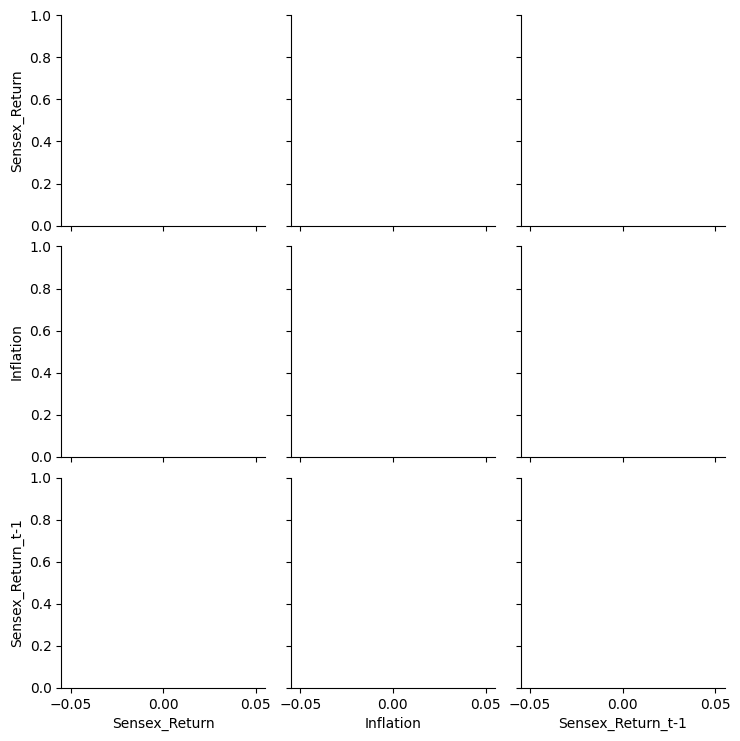

In [ ]:
# Check for Linearity
sns.pairplot(data[['Sensex_Return', 'Inflation', 'Sensex_Return_t-1']])
plt.show()

In [ ]:
# Check for normality
_, p_value = shapiro(data['Sensex_Return'])
print(f"Shapiro-Wilk test p-value: {p_value}")

ValueError: Data must be at least length 3.

In [ ]:
# Check for stationarity
adf_test = adfuller(data['Sensex_Return'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ValueError: zero-size array to reduction operation maximum which has no identity